#### Instituto Tecnológico de Aeronáutica - ITA
#### Divisão de Engenharia Eletrônica - IEE
#### ET-287 - Processamento de sinais usando redes neurais
#### Professora Sarah Negreiros de Carvalho Leite
#### Aluno Felipe Keller Baltor

# Projeto 1 - Analisando Vinhos

In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
# Importações básicas

import numpy as np # biblioteca de manipulação vetorial e numérica
import matplotlib.pyplot as plt # biblioteca para traçar gráficos
import pandas as pd # biblioteca de manipulação de dados tabulares
from pathlib import Path # biblioteca para manipulação de "paths"
import urllib3 # biblioteca para download do dataset
import zipfile

### _1. Baixar a base de dados disponível no repositório da UCI machine learning: https://archive.ics.uci.edu/ml/datasets/wine+quality. Gere uma única planilha para os dados de vinho branco e tinto._

In [20]:
# Checando se estamos no diretório correto

project_dir = Path('.')

assert project_dir.resolve().name == 'project_1'

In [21]:
# Baixando os dados

data_dir = project_dir / 'wine+quality'

if not data_dir.is_dir():
    print("Data folder doesn't exists, checking for zip file")
    data_zip = project_dir / 'wine+quality.zip'
    if not data_zip.is_file():
        print("Zip file doesn't exists, downloading...")
        data_url = 'https://archive.ics.uci.edu/static/public/186/wine+quality.zip'

        http = urllib3.PoolManager()
        r = http.request('GET', data_url, preload_content=False)

        data_file = project_dir / 'wine+quality.zip'

        with open(data_file, 'wb') as out:
            while True:
                data = r.read(2**16)
                if not data:
                    break
                out.write(data)

        r.release_conn()
    
    print("Extracting zip to data folder")
    with zipfile.ZipFile(data_file, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    print("Data folder ready!")
    
else:
    print('Data folder already exists!')

Data folder already exists!


In [22]:
# Printando a descrição dos dados

data_description = data_dir / 'winequality.names'

with open(data_description) as f:
    print(f.read())

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [23]:
# Lendo os dados e criando a tabela única

red = pd.read_csv(data_dir / 'winequality-red.csv', sep=';')
red['type'] = 1 # red

white = pd.read_csv(data_dir / 'winequality-white.csv', sep=';')
white['type'] = 0 # white

data = pd.concat([red, white], ignore_index=True)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### _2. Visualize a dimensão da matriz de dados e do vetor de rótulos._

In [24]:
data.shape

(6497, 13)

### _3. Realize uma análise criteriosa dos dados da base de dados. Pontos que devem ser considerados:_

#### _3.1. A base de dados é consistente?_

#### _3.2 Há dados faltantes?_

In [25]:
data.isnull().values.any()

False

Como se vê pela expressão acima, não existem valores faltantes na base de dados.

#### _3.3 Há dados não numéricos?_

In [26]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                      int64
dtype: object

Na base original não existem dados não numéricos. Esses poderiam ter sido introduzidos com a definição da coluna _type_ (que representa o tipo de vinho

#### _3.4 A base de dados é balanceada? Considere as classes vinho tinto e branco._

Já da importação dos dados pudemos perceber que os valores dos vinhos tintos e brancos era bastante diferente. Obtendo os números exatos abaixo atestamos que a mesma realmente não é balanceada quanto ao tipo de vinho.

In [80]:
# https://stackoverflow.com/a/20076611/12427122

data.type.value_counts()[1], data.type.value_counts()[0]

(1599, 4898)

### _4. Apresente uma análise estatística dos dados que embase quais variáveis de entrada são mais relevantes se quisermos classificar o vinho pelo tipo (tinto vs. branco). Justifique._

In [33]:
data[data.type == 1].mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
type                     1.000000
dtype: float64

In [53]:
100 * data[data.type == 1].std() / data[data.type == 1].mean()

fixed acidity           20.927551
volatile acidity        33.924355
citric acid             71.888809
residual sugar          55.535095
chlorides               53.809492
free sulfur dioxide     65.891077
total sulfur dioxide    70.791666
density                  0.189349
pH                       4.662676
sulphates               25.755113
alcohol                 10.224209
quality                 14.328712
type                     0.000000
dtype: float64

In [49]:
for attr in data.columns:
    if attr == 'type':
        break
        
    corr = np.corrcoef(data[attr], data.type)[1, 0]
    print(f'correlation of {attr} and type: {corr}')

correlation of fixed acidity and type: 0.48673983206805316
correlation of volatile acidity and type: 0.6530355891787227
correlation of citric acid and type: -0.1873965007504359
correlation of residual sugar and type: -0.3488210078111932
correlation of chlorides and type: 0.5126782476623964
correlation of free sulfur dioxide and type: -0.47164366490168
correlation of total sulfur dioxide and type: -0.7003571552968026
correlation of density and type: 0.39064531835422284
correlation of pH and type: 0.32912865072599984
correlation of sulphates and type: 0.487217970057309
correlation of alcohol and type: -0.03296955068617277
correlation of quality and type: -0.11932328463611315


Dada as correlações acima, calculadas entre cada variável e o tipo de vinho (tinto ou branco), as variáveis que mais indicam os tipos de vinho são a volatilidade da acidez (_volatile acidity_) e o dioxido de enxofre total (_total sulfur dioxide_).

### _5. Escolha duas das variáveis de entrada e faça um gráfico de dispersão para visualizar a distribuição dos dados de cada classe de vinho. Justifique sua escolha._

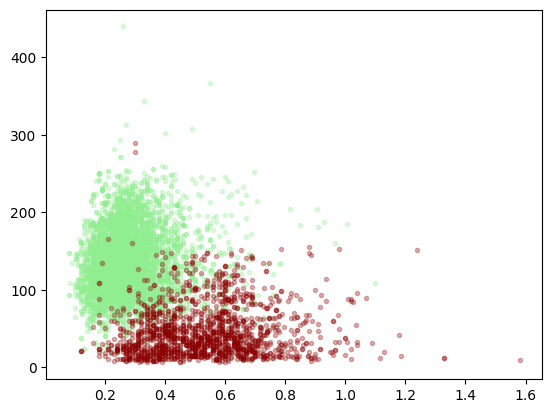

In [71]:
red = data[data.type == 1]
white = data[data.type == 0]

attr_1 = 'volatile acidity'
attr_2 = 'total sulfur dioxide'

plt.scatter(white[attr_1], white[attr_2], color='lightgreen', alpha=0.3, marker='.')
plt.scatter(red[attr_1], red[attr_2], color='darkred', alpha=0.3, marker='.')

### _6. Considerando agora a variável de qualidade do vinho, avalie como é a prevalência nas duas classes para os vinhos mais bem avaliados (nota > 7) e para os avaliados com nota < 3._

In [111]:
high_quality_value = 7

red_good = data[(data.type == 1) & (data.quality > high_quality_value)]
white_good = data[(data.type == 0) & (data.quality > high_quality_value)]

len(red_good), len(white_good)

(18, 180)

Considerando vinhos bem avaliados, percebemos que a sua maioria (10 vezes maior) é composta de vinhos brancos.

In [106]:
len(data[data.quality < 3])

0

Como se vê da expressão acima, não existem vinhos com nota menor do que 3. Vamos considerar notas menor do que 4 então.

In [110]:
low_quality_value = 4
red_bad = data[(data.type == 1) & (data.quality < low_quality_value)]
white_bad = data[(data.type == 0) & (data.quality < low_quality_value)]

len(red_bad), len(white_bad)

(10, 20)

Novamente, há maior prevalência de vinhos brancos entre os piores.